# Time Series, Sequences and Predictions

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2. Deep Neural Network Time Series


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
To: /content/C4_W2_Assignment_Image.png
100% 18.5k/18.5k [00:00<00:00, 15.7MB/s]
Expected:


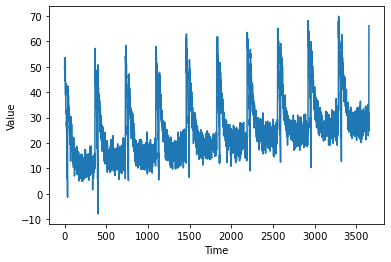

Your output:


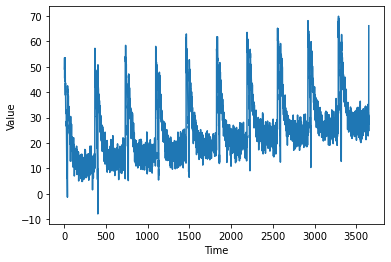

In [6]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi), # YOUR CODE HERE # * np.pi),
                    2 / np.exp(9 * season_time)) #YOUR CODE HERE# / np.exp(#YOUR CODE HERE# * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10 # YOUR CODE HERE #
series = trend(time, 0.1)# YOUR CODE HERE#)    
baseline = 10
amplitude = 40
slope = 0.005 # YOUR CODE HERE#
noise_level = 3 # YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# # # # # expected output
!gdown --id 1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
print("Expected:")
from IPython.display import display
from PIL import Image
path='./C4_W2_Assignment_Image.png'
display(Image.open(path))
# # # # #

### your output
print("Your output:")
plot_series(time, series)

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [4]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu"), # YOUR CODE HERE #),
    tf.keras.layers.Dense(10, activation="relu"), # YOUR CODE HERE #, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))# YOUR CODE HERE #, optimizer=# YOUR CODE HERE#))
model.fit(dataset,epochs=100,verbose=0)

1/1 [==============================] - 0s 23ms/step


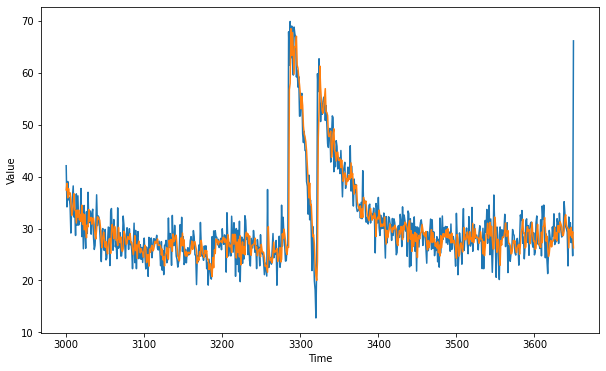

In [8]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [9]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

3.034806

## 3. Recurrent Neural Networks for Time Series

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),# YOUR CODE HERE),
                      input_shape=[None]),
  ### START CODE HERE 
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  ### END CODE HERE 
  tf.keras.layers.Lambda(lambda x: x * 100.0)# YOUR CODE HERE)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9),metrics=["mae"])# PUT YOUR LEARNING RATE HERE#, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=1)


Epoch 1/500
94/94 [==============================] - 10s 32ms/step - loss: 263.1988 - mae: 10.1378
Epoch 2/500
94/94 [==============================] - 5s 47ms/step - loss: 33.6153 - mae: 3.9017
Epoch 3/500
94/94 [==============================] - 3s 31ms/step - loss: 27.7103 - mae: 3.5518
Epoch 4/500
94/94 [==============================] - 3s 32ms/step - loss: 31.9159 - mae: 3.9759
Epoch 5/500
94/94 [==============================] - 3s 32ms/step - loss: 27.1127 - mae: 3.5515
Epoch 6/500
94/94 [==============================] - 3s 32ms/step - loss: 25.7764 - mae: 3.4461
Epoch 7/500
94/94 [==============================] - 3s 33ms/step - loss: 32.1397 - mae: 3.9959
Epoch 8/500
94/94 [==============================] - 3s 32ms/step - loss: 27.8369 - mae: 3.6121
Epoch 9/500
94/94 [==============================] - 3s 32ms/step - loss: 29.2938 - mae: 3.8187
Epoch 10/500
94/94 [==============================] - 3s 32ms/step - loss: 28.0733 - mae: 3.6757
Epoch 11/500
94/94 [================

1/1 [==============================] - 0s 27ms/step


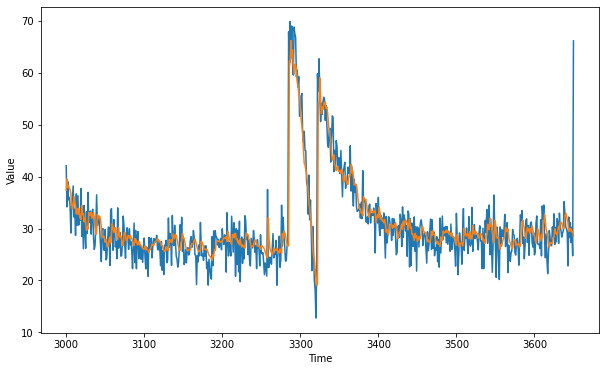

In [11]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [12]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

2.9205353

## Real World Data

In [13]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2022-11-09 22:11:42--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2022-11-09 22:11:42 (5.67 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



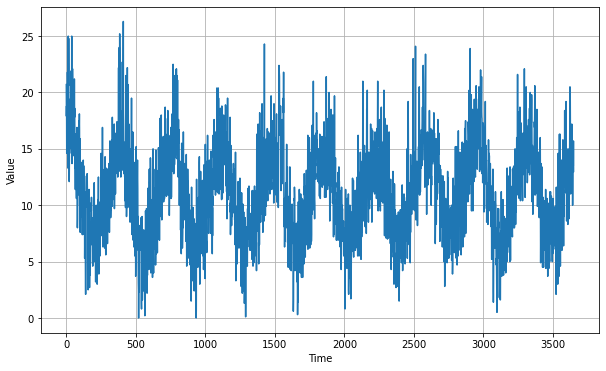

In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

time_step = []
temps = []

with open('./daily-min-temperatures.csv') as csvfile:
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [15]:
split_time = 2500
time_train = time[:split_time] # YOUR CODE HERE
x_train = series[:split_time] # YOUR CODE HERE
time_valid = time[split_time:] # YOUR CODE HERE
x_valid = series[split_time:] # YOUR CODE HERE

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [16]:
def model_forecast(model, series, window_size):
    # YOUR CODE HERE
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
    # YOUR CODE HERE
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)# YOUR CODE HERE, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=150)# YOUR CODE HERE)


Epoch 1/150
25/25 [==============================] - 8s 157ms/step - loss: 10.6941 - mae: 11.1825
Epoch 2/150
25/25 [==============================] - 4s 151ms/step - loss: 3.0952 - mae: 3.5653
Epoch 3/150
25/25 [==============================] - 4s 152ms/step - loss: 3.0016 - mae: 3.4722
Epoch 4/150
25/25 [==============================] - 4s 153ms/step - loss: 2.8482 - mae: 3.3167
Epoch 5/150
25/25 [==============================] - 4s 154ms/step - loss: 2.8188 - mae: 3.2869
Epoch 6/150
25/25 [==============================] - 4s 151ms/step - loss: 2.8375 - mae: 3.3054
Epoch 7/150
25/25 [==============================] - 4s 149ms/step - loss: 2.9575 - mae: 3.4258
Epoch 8/150
25/25 [==============================] - 4s 149ms/step - loss: 2.9996 - mae: 3.4703
Epoch 9/150
25/25 [==============================] - 4s 151ms/step - loss: 2.9264 - mae: 3.3954
Epoch 10/150
25/25 [==============================] - 4s 150ms/step - loss: 2.8423 - mae: 3.3110
Epoch 11/150
25/25 [=================

In [18]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

114/114 [==============================] - 3s 15ms/step


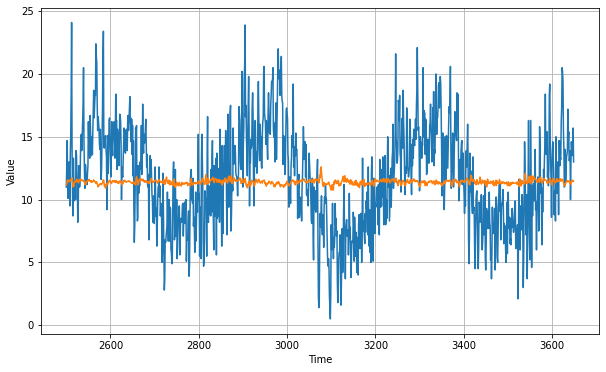

In [19]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [21]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

3.2404904